In [1]:
import os 
branch = "daffy" #@param ['master', 'daffy']
if branch == "daffy":
  !pip install duckietown-gym-daffy
  !pip install pyglet==1.5.15
else:
  if not os.path.isdir('gym-duckietown') and not os.path.isdir('../gym-duckietown'):
    !git clone --branch {branch} https://github.com/duckietown/gym-duckietown.git
    !pip3 install -e gym-duckietown
  if "/gym-duckietown" not in os.getcwd():
    os.chdir('gym-duckietown')
!apt install xvfb -y
!pip3 install pyvirtualdisplay

from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%matplotlib inline

## used to copy the model to the gdrive folder
import shutil

import cv2
import gym
import gym_duckietown

%pip install poliduckie-pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.3/831.3 KB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.4.3 path /usr/local/lib/python3.9/dist-packages
/usr/local/lib/python3.9/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.9/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/local/lib/python3.9/dist-packages/contracts/library/array_ops.py:225: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np

{'audio': ('xaudio2', 'directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True, 'headless': False, 'headless_device': 0}
Cloning into 'poliduckie_segmentation'...
remote: Enumerating objects: 471, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 471 (delta 119), reused 197 (delta 99), pack-reused 239
Receiving objects: 100% (471/471), 52.72 MiB | 36.02 MiB/s, done.
Resolving deltas: 100% (229/229), done.
/content/poliduckie_segmentation
B

In [2]:
# Gym has a built in logger to log information. The information is split in importance levels, from highest to lowest:
# CRITICAL, ERROR, WARNING, INFO, DEBUG, NOTSET
# To stop gym from printing many verbose NOTSET, INFO and DEBUG messages we let it print only level WARNING or higher messages
import logging
gym_duckietown.logger.setLevel(logging.WARNING)

In [3]:
map_name = "Duckietown-ETH_large_loop"

In [4]:
display = Display(visible=0, size=(1400, 900))
display.start()
env = gym.make(map_name)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:601: UserWarning: WARN: Using the latest versioned environment `Duckietown-ETH_large_loop-v0` instead of the unversioned environment `Duckietown-ETH_large_loop`.
  logger.warn(
INFO:duckietown_world: data: /usr/local/lib/python3.9/dist-packages/duckietown_world/data
/usr/local/lib/python3.9/dist-packages/gym/utils/seeding.py:63: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_ste

/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


(480, 640, 3)


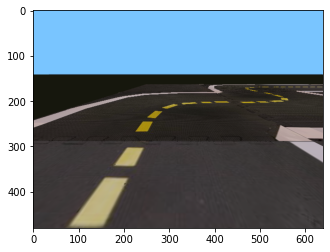

In [5]:
img_example = env.reset()
plt.imshow(img_example)
print(img_example.shape)

In [6]:
from poliduckie_segmentation import Segmentation
from poliduckie_segmentation import BirdEyeView
from skimage.transform import resize

segmentation = Segmentation()

birdeye = BirdEyeView()

img_ex_bird_eye = birdeye.computeBirdEye(img_example)
#img_ex_bird_eye_transformed = np.delete(img_ex_bird_eye, [False, False, False, True], axis=-1)
img_ex_bird_eye_transformed_resized = resize(img_ex_bird_eye, (240, 320, 3), mode='constant', preserve_range='true')
        
#prediction = segmentation.predict(img_ex_bird_eye_transformed_resized)
prediction = segmentation.predict(resize(img_example, (240,320,3), mode='constant', preserve_range='true'))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 240, 320, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 320, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

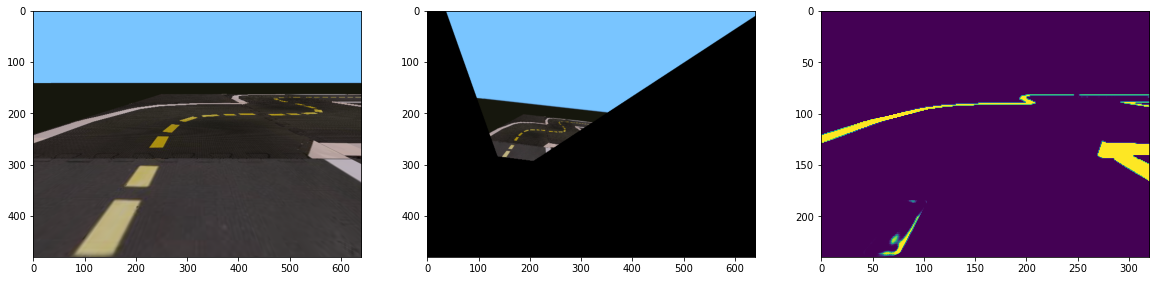

In [7]:
prediction_reshaped = np.reshape(prediction, (240, 320, 3))

f, axarr = plt.subplots(1, 3, figsize=(20, 20))
axarr[0].imshow(img_example)
axarr[1].imshow(img_ex_bird_eye)
axarr[2].imshow(prediction_reshaped[:,:,0])

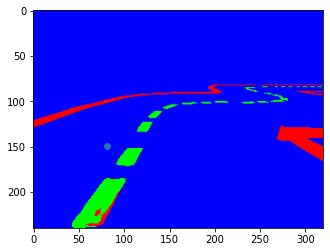

In [8]:
prediction_rounded = np.around(prediction_reshaped)

x = np.nan
while x is np.nan:
  y = 150
  x = np.argwhere(prediction_rounded[y]).mean()
  y -= 1

plt.scatter(x,y)
plt.imshow(prediction_rounded)

In [9]:
lane_width = 0.445 # m
x_factor = lane_width/prediction_rounded.shape[1] # m/px
x_factor

0.001390625

In [10]:
x_cm = x*x_factor
y_cm = 0.1 # m, needs to be tuned

In [11]:
def get_reference_from_segmentation(img, x_factor=0.00139, y_cm=0.1, N=10):
  y = 150
  x = np.argwhere(prediction_rounded[y]).mean()
  x_cm = x*x_factor
  return np.array([[x_cm, y_cm]]*N).T

In [12]:
from poliduckie_segmentation.control import MPC
M = MPC()

In [13]:
r = get_reference_from_segmentation(prediction_rounded, N=11)

f"Reference is {r[0, 0], r[1,0]}"

'Reference is (0.11212521875, 0.1)'

In [14]:
from poliduckie_segmentation.model import Model

# State X = [x, y, angle, longitudinal speed, angular speed]
X = [0,0,0,0,0]

F = Model()
input_list = []
positions = []

counter = 0

while np.square(X[0]-r[0,0]) + np.square(X[1]-r[1,0]) > 0.001 and counter < 20:
  action = M.mpc(X, r[:,:3])
  if counter > 0:
    state = X.toarray().T[0]
  else:
    state = X
  X = F.step(*state, action)
  input_list.append(action)
  positions.append(X[:2])

  counter += 1

input_list = np.array(input_list)
positions = np.array(positions)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



In [15]:
input_list

array([[0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.        ],
       [0.36      , 2.67507404],
       [0.5       , 0.        ],
       [0.23      , 5.15907137],
       [0.5       , 0.        ],
       [0.25      , 4.77691793],
       [0.5       , 0.        ],
       [0.225     , 5.25460973],
       [0.5       , 0.        ],
       [0.205     , 5.63676316]])

In [16]:
input_list_clipped = np.clip(input_list, 0, 1)

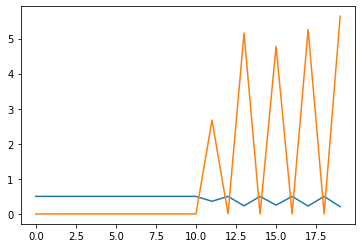

In [17]:
plt.plot(input_list)

In [18]:
positions.reshape(-1,2)

array([[0.        , 0.        ],
       [0.00166667, 0.        ],
       [0.00472222, 0.        ],
       [0.00893519, 0.        ],
       [0.01411265, 0.        ],
       [0.02009388, 0.        ],
       [0.0267449 , 0.        ],
       [0.03395408, 0.        ],
       [0.0416284 , 0.        ],
       [0.04969033, 0.        ],
       [0.05807528, 0.        ],
       [0.0667208 , 0.00038571],
       [0.07509915, 0.00113479],
       [0.08364287, 0.00264675],
       [0.0913688 , 0.00471143],
       [0.09922068, 0.00749559],
       [0.10631945, 0.01066884],
       [0.11343738, 0.01463114],
       [0.11967834, 0.01885991],
       [0.1258116 , 0.02391644]])

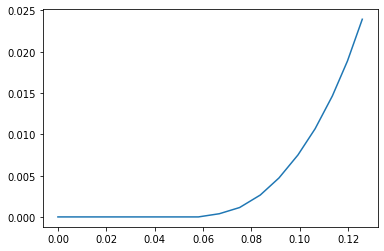

In [19]:
plt.plot(*positions.reshape(-1, 2).T)

In [20]:
img_frames = []
for action in input_list_clipped:
  env.step(action)
  img_frames.append(env.render(mode='rgb_array'))

/usr/local/lib/python3.9/dist-packages/geometry/poses.py:274: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  linear = np.array(linear, dtype='float64')
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/utils/passive

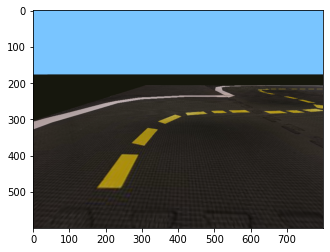

In [21]:
plt.imshow(img_frames[-1])

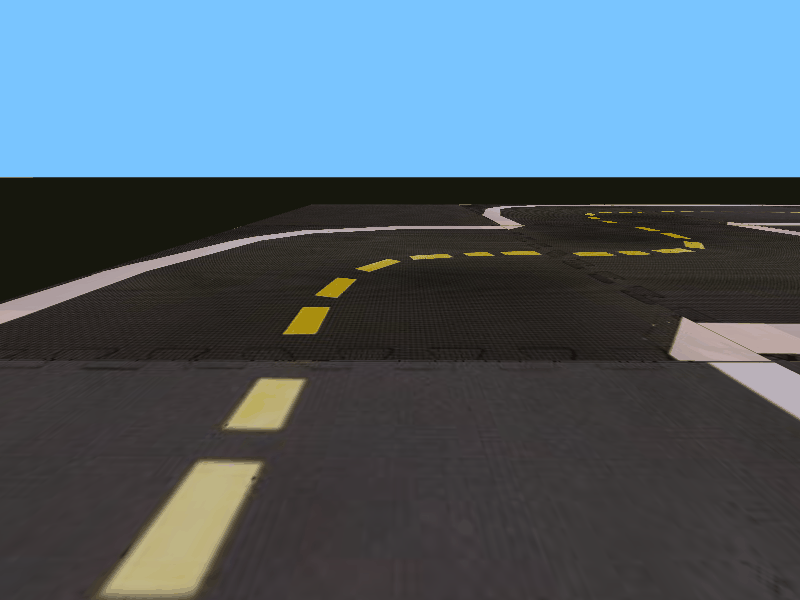

In [22]:
import imageio
from IPython.display import Image

imageio.mimsave('mpc.gif', img_frames)
Image(open('mpc.gif','rb').read())

## Now multiple inputs

In [23]:
# https://stackoverflow.com/questions/47910681/tensorflow-setting-allow-growth-to-true-does-still-allocate-memory-of-all-my-gp
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [24]:
img = env.reset()
img_frames = []
action_list = []

X = [0,0,0,0,0]
for iteration in range(50):
  img = birdeye.computeBirdEye(img)
  #img = np.delete(img, [False, False, False, True], axis=-1)
  img = resize(img, (240, 320, 3), mode='constant', preserve_range='true')
  prediction = segmentation.predict(img)
  prediction_reshaped = np.reshape(prediction, (240, 320, 3))
  prediction_rounded = np.around(prediction_reshaped)
  r = get_reference_from_segmentation(prediction_rounded[1], N=11)
  if iteration > 0:
    state = X.toarray().T[0]
  else:
    state = X
  action = M.mpc(state, r[:,:3])
  X = F.step(*state, action)
  env.step(action)
  action_list.append(action)
  img = cv2.resize(img,(320,240),interpolation=cv2.INTER_CUBIC)
  img = cv2.circle(img, (int(r[0,0]/0.001390625), 120), 10, color=(0, 0, 255), thickness=-1)
  img_frames.append(img)
  img = env.render(mode='rgb_array')
  

/usr/local/lib/python3.9/dist-packages/gym/utils/seeding.py:63: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


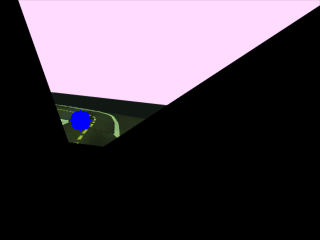

In [25]:
imageio.mimsave('run_mpc.gif', img_frames)
Image(open('run_mpc.gif','rb').read())

In [26]:
action_list

[array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.5, 0. ]),
 array([0.36      , 2.67507404]),
 array([0.5, 0. ]),
 array([0.23      , 5.15907137]),
 array([0.5, 0. ]),
 array([0.255     , 4.68137957]),
 array([0.5, 0. ]),
 array([0.22      , 5.35014808]),
 array([0.5, 0. ]),
 array([0.21     , 5.5412248]),
 array([0.5, 0. ]),
 array([0.2       , 5.73230152]),
 array([0.5, 0. ]),
 array([0.2       , 5.73230152]),
 array([0.5, 0. ]),
 array([0.2       , 5.73230152]),
 array([0.5, 0. ]),
 array([-0.02      ,  1.52861374]),
 array([0.2       , 5.73230152]),
 array([0.5, 0. ]),
 array([-0.1,  0. ]),
 array([-0.1,  0. ]),
 array([-0.1,  0. ]),
 array([-0.1,  0. ]),
 array([-0.1,  0. ]),
 array([-0.1,  0. ]),
 array([-0.1,  0. ]),
 array([-0.065     , -0.66876851]),
 array([-0.1,  0. ]),
 array([-0.025     , -1.43307538]),
 array([-0.1